**Import libraries**

In [ ]:
#import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

**Load the dataset**

In [ ]:
#load the dataset using pandas
df = pd.read_csv('/content/tmdb_5000_movies_cleaned.csv')

In [ ]:
df_encoded = df
df_encoded.head()

,genres_1,genres_2,budget,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,popularity,...,runtime,title,vote_average,vote_count,movie_id,actor1,actor2,actor3,release_season,tagline
0,Action,Adventure,237000000.0,cultureclash,future,spacewar,spacecolony,society,spacetravel,150.437577,...,162.0,Avatar,7.2,11800.0,19995.0,Sam Worthington,Zoe Saldana,Sigourney Weaver,Winter,Enter the World of Pandora.
1,Adventure,Fantasy,300000000.0,ocean,drugabuse,exoticisland,eastindiatradingcompany,loveofone'slife,traitor,139.082615,...,169.0,Pirates of the Caribbean: At World's End,6.9,4500.0,285.0,Johnny Depp,Orlando Bloom,Keira Knightley,Summer,"At the end of the world, the adventure begins."
2,Action,Adventure,245000000.0,spy,basedonnovel,secretagent,sequel,mi6,britishsecretservice,107.376788,...,148.0,Spectre,6.3,4466.0,206647.0,Daniel Craig,Christoph Waltz,Léa Seydoux,Winter,A Plan No One Escapes
3,Action,Crime,250000000.0,dccomics,crimefighter,terrorist,secretidentity,burglar,hostagedrama,112.312950,...,165.0,The Dark Knight Rises,7.6,9106.0,49026.0,Christian Bale,Michael Caine,Gary Oldman,Fall,The Legend Ends
4,Action,Adventure,260000000.0,basedonnovel,mars,medallion,spacetravel,princess,alien,43.926995,...,132.0,John Carter,6.1,2124.0,49529.0,Taylor Kitsch,Lynn Collins,Samantha Morton,Spring,"Lost in our world, found in another."


In [ ]:
#Summing up the number of missing rows in each column feature
print(df_encoded.isna().sum())
print("total samples:", len(df_encoded))

genres_1                  29
genres_2                 929
budget                     1
keyword_1                413
keyword_2                701
keyword_3                984
keyword_4               1328
keyword_5               1715
keyword_6               2172
popularity                 1
production_companies     356
revenue                    1
runtime                    3
title                      1
vote_average               1
vote_count                 1
movie_id                  17
actor1                    66
actor2                    76
actor3                    86
release_season             0
tagline                  845
dtype: int64
total samples: 4804


In [ ]:
#Drop the column tagline
missing_columns = ["tagline"]
df_encoded.drop(missing_columns, axis=1, inplace=True)

In [ ]:
# Imputed missing values with dummy values
df_encoded['genres_1'].fillna('Unknown', inplace=True)
df_encoded['genres_2'].fillna('Unknown', inplace=True)
df_encoded['budget'].fillna(0, inplace=True)
df_encoded['keyword_1'].fillna('Unknown', inplace=True)
df_encoded['keyword_2'].fillna('Unknown', inplace=True)
df_encoded['keyword_3'].fillna('Unknown', inplace=True)
df_encoded['keyword_4'].fillna('Unknown', inplace=True)
df_encoded['keyword_5'].fillna('Unknown', inplace=True)
df_encoded['keyword_6'].fillna('Unknown', inplace=True)
df_encoded['popularity'].fillna(0, inplace=True)
df_encoded['production_companies'].fillna('Unknown', inplace=True)
df_encoded['revenue'].fillna(0, inplace=True)
df_encoded['runtime'].fillna(0, inplace=True)
df_encoded['movie_id'].fillna(0, inplace=True)
df_encoded['actor1'].fillna('Unknown', inplace=True)
df_encoded['actor2'].fillna('Unknown', inplace=True)
df_encoded['actor3'].fillna('Unknown', inplace=True)
df_encoded['vote_average'].fillna(0, inplace=True)
df_encoded['vote_count'].fillna(0, inplace=True)
df_encoded['title'].fillna('Unknown', inplace=True)

#making sure we are taking care of all missing values
print(df_encoded.isna().sum())
print("Total Samples after handling missing values:", len(df_encoded))


genres_1                0
genres_2                0
budget                  0
keyword_1               0
keyword_2               0
keyword_3               0
keyword_4               0
keyword_5               0
keyword_6               0
popularity              0
production_companies    0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
movie_id                0
actor1                  0
actor2                  0
actor3                  0
release_season          0
dtype: int64
Total Samples after handling missing values: 4804


In [ ]:
#Drop the rows with missing values and reset the indexing of the dataset
df_encoded = df_encoded.dropna()
df_encoded = df_encoded.reset_index(drop=True)
print(len(df_encoded))

4804


In [ ]:
#Define the genre_1 column as the target column
df_encoded['target'] = df_encoded['genres_1']

In [ ]:
#drop the genre_1 column
genre_columns = ["genres_1"]
df_encoded.drop(genre_columns, axis=1, inplace=True)

In [ ]:
df_encoded.head()

,genres_2,budget,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,popularity,production_companies,...,runtime,title,vote_average,vote_count,movie_id,actor1,actor2,actor3,release_season,target
0,Adventure,237000000.0,cultureclash,future,spacewar,spacecolony,society,spacetravel,150.437577,Ingenious Film Partners,...,162.0,Avatar,7.2,11800.0,19995.0,Sam Worthington,Zoe Saldana,Sigourney Weaver,Winter,Action
1,Fantasy,300000000.0,ocean,drugabuse,exoticisland,eastindiatradingcompany,loveofone'slife,traitor,139.082615,Walt Disney Pictures,...,169.0,Pirates of the Caribbean: At World's End,6.9,4500.0,285.0,Johnny Depp,Orlando Bloom,Keira Knightley,Summer,Adventure
2,Adventure,245000000.0,spy,basedonnovel,secretagent,sequel,mi6,britishsecretservice,107.376788,Columbia Pictures,...,148.0,Spectre,6.3,4466.0,206647.0,Daniel Craig,Christoph Waltz,Léa Seydoux,Winter,Action
3,Crime,250000000.0,dccomics,crimefighter,terrorist,secretidentity,burglar,hostagedrama,112.312950,Legendary Pictures,...,165.0,The Dark Knight Rises,7.6,9106.0,49026.0,Christian Bale,Michael Caine,Gary Oldman,Fall,Action
4,Adventure,260000000.0,basedonnovel,mars,medallion,spacetravel,princess,alien,43.926995,Walt Disney Pictures,...,132.0,John Carter,6.1,2124.0,49529.0,Taylor Kitsch,Lynn Collins,Samantha Morton,Spring,Action


Class Distribution:
Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Unknown              29
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: target, dtype: int64


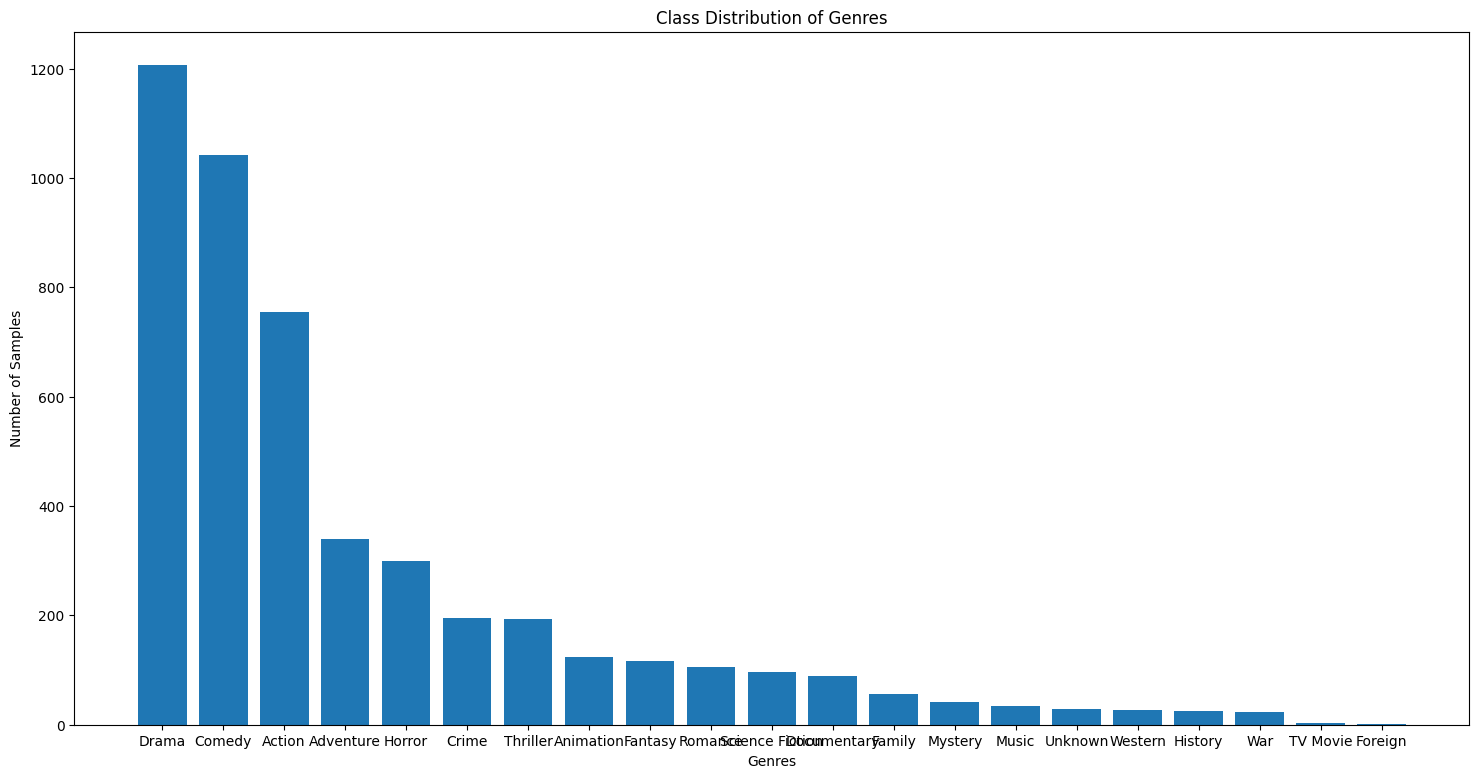

In [ ]:
#Checking class distribution for class imbalances
class_distribution = df_encoded['target'].value_counts()


print("Class Distribution:")
print(class_distribution)
plt.figure(figsize=(18, 9))
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Genres')
plt.ylabel('Number of Samples')
plt.title('Class Distribution of Genres')
plt.show()

Number of Samples after filtering: 3642
Class Distribution after filtering:
Drama        1207
Comedy       1042
Action        754
Adventure     339
Horror        300
Name: target, dtype: int64


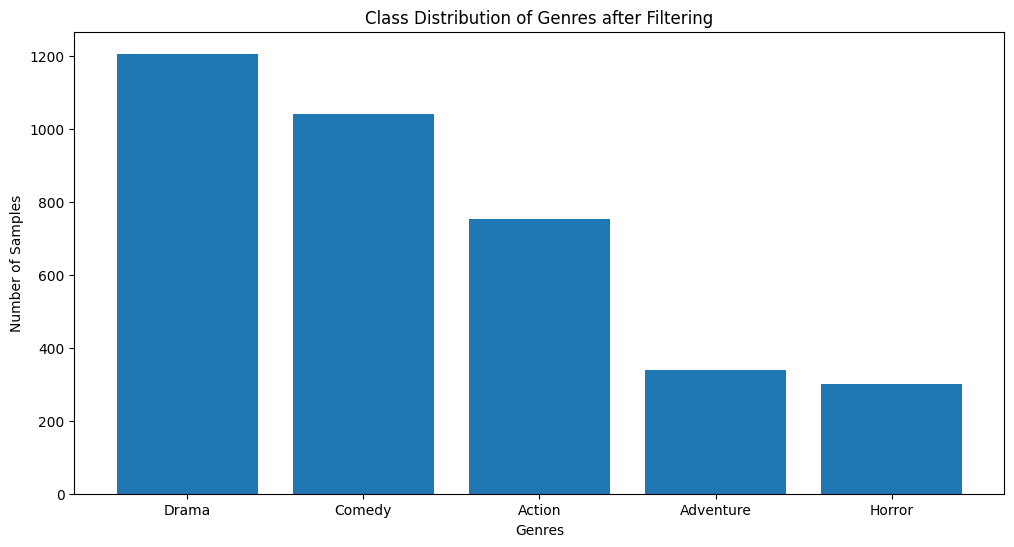

In [ ]:
#Fixing class imbalance issues (leaving classes with atleast 200 records)
class_distribution = df_encoded['target'].value_counts()
small_classes = class_distribution[class_distribution < 200].index
df_encoded_filtered = df_encoded[~df_encoded['target'].isin(small_classes)].reset_index(drop=True)

print("Number of Samples after filtering:", len(df_encoded_filtered))
print("Class Distribution after filtering:")
print(df_encoded_filtered['target'].value_counts())

#visualize the filtered class distribution
plt.figure(figsize=(12, 6))
plt.bar(df_encoded_filtered['target'].value_counts().index, df_encoded_filtered['target'].value_counts().values)
plt.xlabel('Genres')
plt.ylabel('Number of Samples')
plt.title('Class Distribution of Genres after Filtering')
plt.show()

In [ ]:
df_encoded_filtered

,genres_2,budget,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,popularity,production_companies,...,runtime,title,vote_average,vote_count,movie_id,actor1,actor2,actor3,release_season,target
0,Adventure,237000000.0,cultureclash,future,spacewar,spacecolony,society,spacetravel,150.437577,Ingenious Film Partners,...,162.0,Avatar,7.2,11800.0,19995.0,Sam Worthington,Zoe Saldana,Sigourney Weaver,Winter,Action
1,Fantasy,300000000.0,ocean,drugabuse,exoticisland,eastindiatradingcompany,loveofone'slife,traitor,139.082615,Walt Disney Pictures,...,169.0,Pirates of the Caribbean: At World's End,6.9,4500.0,285.0,Johnny Depp,Orlando Bloom,Keira Knightley,Summer,Adventure
2,Adventure,245000000.0,spy,basedonnovel,secretagent,sequel,mi6,britishsecretservice,107.376788,Columbia Pictures,...,148.0,Spectre,6.3,4466.0,206647.0,Daniel Craig,Christoph Waltz,Léa Seydoux,Winter,Action
3,Crime,250000000.0,dccomics,crimefighter,terrorist,secretidentity,burglar,hostagedrama,112.312950,Legendary Pictures,...,165.0,The Dark Knight Rises,7.6,9106.0,49026.0,Christian Bale,Michael Caine,Gary Oldman,Fall,Action
4,Adventure,260000000.0,basedonnovel,mars,medallion,spacetravel,princess,alien,43.926995,Walt Disney Pictures,...,132.0,John Carter,6.1,2124.0,49529.0,Taylor Kitsch,Lynn Collins,Samantha Morton,Spring,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,Unknown,0.0,confession,hazing,gangmember,latino,lgbt,catholicpriest,0.029757,Iconoclast Films,...,90.0,On The Downlow,6.0,2.0,182291.0,Tony Sancho,Michael Cortez,Donato Cruz,Summer,Drama
3638,Unknown,0.0,gang,audition,policefake,homeless,actress,Unknown,0.918116,Asylum Films,...,98.0,Bang,6.0,1.0,124606.0,Darling Narita,Peter Greene,Michael Newland,Fall,Drama
3639,Crime,220000.0,unitedstates\u2013mexicobarrier,legs,arms,paperknife,guitarcase,Unknown,14.269792,Columbia Pictures,...,81.0,El Mariachi,6.6,238.0,9367.0,Carlos Gallardo,Jaime de Hoyos,Peter Marquardt,Fall,Action
3640,Romance,9000.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.642552,Unknown,...,85.0,Newlyweds,5.9,5.0,72766.0,Edward Burns,Kerry Bishé,Marsha Dietlein,Winter,Comedy


In [ ]:
#Label encode the categorical columns into numerical values
label_encoder = LabelEncoder()

for column in df_encoded_filtered.select_dtypes(include=['object']).columns:
    df_encoded_filtered[column] = label_encoder.fit_transform(df_encoded_filtered[column])

In [ ]:
df_encoded_filtered

,genres_2,budget,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,popularity,production_companies,...,runtime,title,vote_average,vote_count,movie_id,actor1,actor2,actor3,release_season,target
0,1,237000000.0,274,551,1418,1426,1331,1179,150.437577,491,...,162.0,292,7.2,11800.0,19995.0,1425,2194,2197,3,0
1,8,300000000.0,741,411,465,457,852,1296,139.082615,994,...,169.0,2017,6.9,4500.0,285.0,808,1618,1355,2,1
2,1,245000000.0,987,116,1319,1350,914,202,107.376788,210,...,148.0,2418,6.3,4466.0,206647.0,355,369,1546,3,0
3,4,250000000.0,286,341,1538,1335,226,638,112.312950,555,...,165.0,2740,7.6,9106.0,49026.0,296,1474,804,0,0
4,1,260000000.0,88,831,923,1434,1116,20,43.926995,994,...,132.0,1424,6.1,2124.0,49529.0,1551,1328,2109,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,17,0.0,249,614,581,827,817,248,0.029757,474,...,90.0,1920,6.0,2.0,182291.0,1607,1477,620,2,3
3638,17,0.0,430,87,1127,697,12,5,0.918116,83,...,98.0,322,6.0,1.0,124606.0,366,1670,1713,0,3
3639,4,220000.0,1087,752,68,1089,630,5,14.269792,210,...,81.0,861,6.6,238.0,9367.0,236,856,1916,0,0
3640,14,9000.0,2,3,6,5,8,5,0.642552,973,...,85.0,1862,5.9,5.0,72766.0,448,1189,1610,3,2


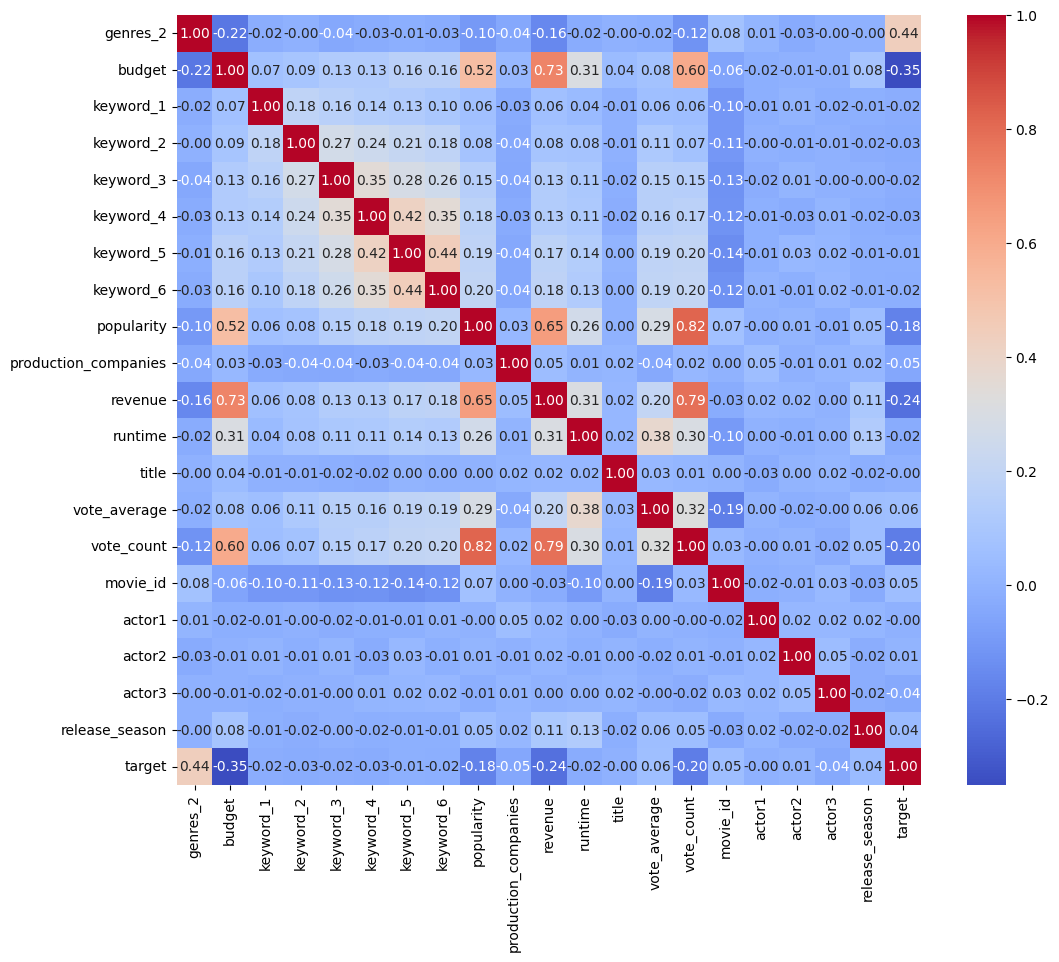

In [ ]:
#Visualize the features relation using correlation matrix
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded_filtered.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
#Define the features as X and target as y
X = df_encoded_filtered.drop('target', axis=1)
y = df_encoded_filtered['target']

#Scale and transform the features using minmax scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#create a new dataframe to store the scaled data
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#assign scaled target as y
df_scaled['target'] = y

In [ ]:
df_scaled

,genres_2,budget,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,popularity,production_companies,...,runtime,title,vote_average,vote_count,movie_id,actor1,actor2,actor3,release_season,target
0,0.052632,0.623684,0.237435,0.361311,0.824419,0.833918,0.820592,0.837358,0.207715,0.473938,...,0.586957,0.080242,0.72,0.858057,0.046885,0.840212,0.998635,0.881621,1.000000,0
1,0.421053,0.789474,0.642114,0.269508,0.270349,0.267251,0.525277,0.920455,0.192037,0.959459,...,0.612319,0.554273,0.69,0.327225,0.000668,0.476415,0.736459,0.543740,0.666667,1
2,0.052632,0.644737,0.855286,0.076066,0.766860,0.789474,0.563502,0.143466,0.148259,0.202703,...,0.536232,0.664468,0.63,0.324753,0.484553,0.209316,0.167956,0.620385,1.000000,0
3,0.210526,0.657895,0.247834,0.223607,0.894186,0.780702,0.139334,0.453125,0.155075,0.535714,...,0.597826,0.752954,0.76,0.662158,0.114958,0.174528,0.670915,0.322632,0.000000,0
4,0.052632,0.684211,0.076256,0.544918,0.536628,0.838596,0.688039,0.014205,0.060651,0.959459,...,0.478261,0.391316,0.61,0.154450,0.116137,0.914505,0.604461,0.846308,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,0.894737,0.000000,0.215771,0.402623,0.337791,0.483626,0.503699,0.176136,0.000041,0.457529,...,0.326087,0.527617,0.60,0.000145,0.427443,0.947524,0.672280,0.248796,0.666667,3
3638,0.894737,0.000000,0.372617,0.057049,0.655233,0.407602,0.007398,0.003551,0.001267,0.080116,...,0.355072,0.088486,0.60,0.000073,0.292181,0.215802,0.760127,0.687400,0.000000,3
3639,0.210526,0.000579,0.941941,0.493115,0.039535,0.636842,0.388409,0.003551,0.019702,0.202703,...,0.293478,0.236603,0.66,0.017307,0.021964,0.139151,0.389622,0.768860,0.000000,0
3640,0.736842,0.000024,0.001733,0.001967,0.003488,0.002924,0.004932,0.003551,0.000887,0.939189,...,0.307971,0.511679,0.59,0.000364,0.170624,0.264151,0.541193,0.646067,1.000000,2


In [ ]:
#Drop the missing values in the scaled data and reset the indexing of the data
df_normalized = df_scaled
df_normalized = df_normalized.dropna()
df_normalized = df_normalized.reset_index(drop=True)

In [ ]:
df_normalized

,genres_2,budget,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,popularity,production_companies,...,runtime,title,vote_average,vote_count,movie_id,actor1,actor2,actor3,release_season,target
0,0.052632,0.623684,0.237435,0.361311,0.824419,0.833918,0.820592,0.837358,0.207715,0.473938,...,0.586957,0.080242,0.72,0.858057,0.046885,0.840212,0.998635,0.881621,1.000000,0
1,0.421053,0.789474,0.642114,0.269508,0.270349,0.267251,0.525277,0.920455,0.192037,0.959459,...,0.612319,0.554273,0.69,0.327225,0.000668,0.476415,0.736459,0.543740,0.666667,1
2,0.052632,0.644737,0.855286,0.076066,0.766860,0.789474,0.563502,0.143466,0.148259,0.202703,...,0.536232,0.664468,0.63,0.324753,0.484553,0.209316,0.167956,0.620385,1.000000,0
3,0.210526,0.657895,0.247834,0.223607,0.894186,0.780702,0.139334,0.453125,0.155075,0.535714,...,0.597826,0.752954,0.76,0.662158,0.114958,0.174528,0.670915,0.322632,0.000000,0
4,0.052632,0.684211,0.076256,0.544918,0.536628,0.838596,0.688039,0.014205,0.060651,0.959459,...,0.478261,0.391316,0.61,0.154450,0.116137,0.914505,0.604461,0.846308,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,0.894737,0.000000,0.215771,0.402623,0.337791,0.483626,0.503699,0.176136,0.000041,0.457529,...,0.326087,0.527617,0.60,0.000145,0.427443,0.947524,0.672280,0.248796,0.666667,3
3638,0.894737,0.000000,0.372617,0.057049,0.655233,0.407602,0.007398,0.003551,0.001267,0.080116,...,0.355072,0.088486,0.60,0.000073,0.292181,0.215802,0.760127,0.687400,0.000000,3
3639,0.210526,0.000579,0.941941,0.493115,0.039535,0.636842,0.388409,0.003551,0.019702,0.202703,...,0.293478,0.236603,0.66,0.017307,0.021964,0.139151,0.389622,0.768860,0.000000,0
3640,0.736842,0.000024,0.001733,0.001967,0.003488,0.002924,0.004932,0.003551,0.000887,0.939189,...,0.307971,0.511679,0.59,0.000364,0.170624,0.264151,0.541193,0.646067,1.000000,2


In [ ]:
#Split the data into three sets for training, development and testing
# the splitting ration of 70:15:15 percents
data = df_normalized.values

total_samples = len(data)
train = data[: int(total_samples*0.7)]
dev = data[int(total_samples*0.7):int(total_samples*0.85)]
test = data[int(total_samples*0.85):int(total_samples):]

In [ ]:
test

array([[5.26315789e-02, 0.00000000e+00, 1.73310225e-03, ...,
        8.69983949e-01, 3.33333333e-01, 0.00000000e+00],
       [8.42105263e-01, 6.84210526e-03, 3.30155979e-01, ...,
        8.94863563e-02, 1.00000000e+00, 4.00000000e+00],
       [6.31578947e-01, 6.68631579e-03, 3.29289428e-01, ...,
        2.27126806e-01, 6.66666667e-01, 2.00000000e+00],
       ...,
       [2.10526316e-01, 5.78947368e-04, 9.41941075e-01, ...,
        7.68860353e-01, 0.00000000e+00, 0.00000000e+00],
       [7.36842105e-01, 2.36842105e-05, 1.73310225e-03, ...,
        6.46067416e-01, 1.00000000e+00, 2.00000000e+00],
       [3.15789474e-01, 0.00000000e+00, 2.46100520e-01, ...,
        1.94221509e-01, 1.00000000e+00, 2.00000000e+00]])

In [ ]:
#Define the funtion to extract features and labels from the normalized data
def get_features_and_labels(data):
  features = data[:,:-1]
  labels = data[:, -1]
  return (features, labels)

In [ ]:
#Extract features and labels for the training, development and test sets
train_x, train_y = get_features_and_labels(train)
dev_x, dev_y = get_features_and_labels(dev)
test_x, test_y = get_features_and_labels(test)

In [ ]:
print(len(test_y))

547


In [ ]:
# -Distance Formulas-
#The function to calcualte distance between two rows using manhattan formula
import math
# Selected Formula
def manhattan_distance(row1, row2):
  distance = 0.0
  for i in range(len(row1)):
    distance += abs((row1[i]-row2[i]))
  return distance

In [ ]:
#The function to calculate distance between two rows using euclidean formula
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i]) ** 2
    return math.sqrt(distance)


In [ ]:
#The function to calculate distance between two rows using chebyshev formula
def chebyshev_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance = max(distance, abs(row1[i] - row2[i]))
    return distance


In [ ]:
# -Algorithm Determining Neighbors-
#The function to find the distance between nearest neigbors of each row
def get_neighbors(train_x, train_y, test_row, num_neighbors):
  distance = [] # list to store distance between neigbors
  for index in range(len(train_x)):
    train_row = train_x[index]
    train_label = train_y[index]
    dist = manhattan_distance(train_row, test_row)
    distance.append((train_row, train_label, dist))

  # print(distance)
  distance.sort(key=lambda i:i[2])

  output_neighbor = []
  output_labels = []
  output_distances = []
  for index in range(num_neighbors):
    output_neighbor.append(distance[index][0])
    output_labels.append(distance[index][1])
    output_distances.append(distance[index][2])
  # print(" \n empty line \n ")

  return output_neighbor, output_labels, output_distances

In [ ]:
#Find the distance between 3 neigbors of training set and development set
get_neighbors(train_x, train_y, dev_x[5], 3)

([array([0.31578947, 0.        , 0.98526863, 0.00196721, 0.00348837,
         0.00292398, 0.00493218, 0.00355114, 0.014372  , 0.36003861,
         0.00771915, 0.36231884, 0.39901072, 0.61      , 0.00719895,
         0.08932185, 0.77063679, 0.18934911, 0.76083467, 0.66666667]),
  array([0.15789474, 0.07368421, 0.85268631, 0.43278689, 0.00348837,
         0.00292398, 0.00493218, 0.00355114, 0.00612556, 0.44208494,
         0.00318804, 0.43115942, 0.50288541, 0.6       , 0.00501745,
         0.03563682, 0.82841981, 0.34501593, 0.65088283, 1.        ]),
  array([0.63157895, 0.        , 0.28942808, 0.00196721, 0.00348837,
         0.00292398, 0.00493218, 0.00355114, 0.00757103, 0.26351351,
         0.        , 0.37318841, 0.66117065, 0.63      , 0.00341768,
         0.03436358, 0.84316038, 0.0860264 , 0.87158909, 1.        ])],
 [2.0, 3.0, 2.0],
 [1.485713453725832, 1.559250164504888, 1.5921868001133668])

In [ ]:
# -Prediction Classifier for KNN Model-
#Function to define the predictions of nearest neigbors
def prediction_classifier(train_x, train_y, test_row, num_neighbors):
  output_neighbor, output_labels, output_distances = get_neighbors(train_x, train_y, test_row, num_neighbors)
  pre_label = np.bincount(output_labels)
  pre = np.argmax(pre_label)
  return pre

In [ ]:
#use the prediction classifier to predict the class label of development[0] set
prediction_classifier(train_x, train_y, dev_x[0], 3)

0

In [ ]:
#List the prediction class label for development set using the 5 nearest neigbors
pre_label = []
k = 5
for dev_data in dev_x:
  pre = prediction_classifier(train_x, train_y, dev_data, k)
  pre_label.append(pre)

In [ ]:
#predict the accuracy of the knn using the development labels
acc = accuracy_score(dev_y, pre_label)
print(acc)

0.3956043956043956


In [ ]:
#create a list of k values between 1 and 102 increment each by 4
k_list = list(range(1,102,4))
print(k_list)

[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101]


In [ ]:
# -Determine optimal k-value for test set from k_list-
#define a list to store the performance of each k to find the optimal k value
performance = []
for k in k_list:
  pre_label = []
  for dev_data in dev_x:
    pre = prediction_classifier(train_x, train_y, dev_data, k)
    pre_label.append(pre)
  acc = accuracy_score(dev_y, pre_label)
  performance.append(acc)

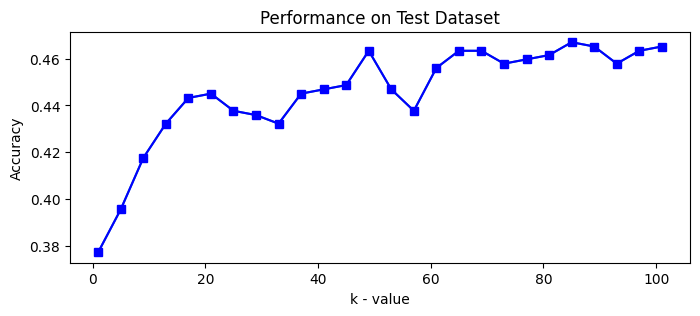

In [ ]:
#Visualize the performance of each k value by plotting
plt.figure(figsize= (8, 3))
plt.plot(k_list, performance)
plt.plot(k_list, performance, 'b', marker='s')
plt.xlabel('k - value')
plt.ylabel('Accuracy')
plt.title('Performance on Test Dataset')
plt.show()

In [ ]:
#Use the optimal K value to predict  test labels and store in list
k = 97
pre_label = []

for test_data in test_x:
  pre = prediction_classifier(train_x, train_y, test_data, k)
  pre_label.append(pre)
acc = accuracy_score(test_y, pre_label)
performance.append(acc)
print(acc)

0.40585009140767825


In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, pre_label)
print("MAE:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_y, pre_label)
print("MSE:", mse)

MAE: 0.8271604938271605
MSE: 1.5102880658436213


In [ ]:
individual_test = [0.736842, 0.005263, 0.0, 0.891148, 0.608721, 0.074854, 0.889026, 0.984375, 0.025163, 0.166023, 0.00053, 0.355072, 0.758175, 0.68, 0.020288, 0.5865, 0.085495, 0.555303, 0.026083, 0.0, 0.632329] #3 $3169
# individual_test = [0.368421, 0.031579, 0.001733, 0.001967, 0.003488, 0.002924, 0.004932, 0.003551, 0.001493, 0.959459, 0.006203, 0.311594, 0.464138, 0.54, 0.0024, 0.081012, 0.028302, 0.996814, 0.731942, 1.0, 0.320636] #2 #2165
label_encoder.fit(train_y)
mytest = prediction_classifier(train_x, train_y, individual_test, k)
predicted_label = label_encoder.inverse_transform([mytest])[0]

print("Predicted Label:", predicted_label)

Predicted Label: 3.0


----

## Implementing Mutli-class Logistic Regression
----


In [ ]:
data = df_normalized.values

total_samples = len(data)
train = data[: int(total_samples*0.8)]
test = data[int(total_samples*0.8):int(total_samples):]

In [ ]:
test

array([[2.10526316e-01, 1.05263158e-02, 5.24263432e-01, ...,
        1.57704655e-01, 1.00000000e+00, 2.00000000e+00],
       [3.15789474e-01, 1.05263158e-02, 8.72616984e-01, ...,
        4.45024077e-01, 3.33333333e-01, 2.00000000e+00],
       [8.94736842e-01, 1.05263158e-02, 3.55285962e-02, ...,
        5.91091493e-01, 1.00000000e+00, 3.00000000e+00],
       ...,
       [2.10526316e-01, 5.78947368e-04, 9.41941075e-01, ...,
        7.68860353e-01, 0.00000000e+00, 0.00000000e+00],
       [7.36842105e-01, 2.36842105e-05, 1.73310225e-03, ...,
        6.46067416e-01, 1.00000000e+00, 2.00000000e+00],
       [3.15789474e-01, 0.00000000e+00, 2.46100520e-01, ...,
        1.94221509e-01, 1.00000000e+00, 2.00000000e+00]])

In [ ]:
def get_features_and_labels(data):
  features = data[:,:-1]
  labels = data[:, -1]
  return (features, labels)

train_x, train_y = get_features_and_labels(train)
test_x, test_y = get_features_and_labels(test)

In [ ]:
#Apply logistic regression modelling to dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#define the paremeter to use in logistic regression
model = LogisticRegression(multi_class='multinomial', max_iter=2000, C=0.001)
#Fit the train data into the model
model.fit(train_x, train_y)

#predict the labels of the test features
y_pred = model.predict(test_x)

#Find the accuracy of model using the test y and predict set
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

#Find recall and f1-score of the model and output the classification report
recall = classification_report(test_y, y_pred, output_dict=True, zero_division=1)['weighted avg']['recall']
f1 = classification_report(test_y, y_pred, output_dict=True, zero_division=1)['weighted avg']['f1-score']

print("Weighted Avg Recall:", recall)
print("Weighted Avg F1 Score:", f1)

Accuracy: 0.4224965706447188
Weighted Avg Recall: 0.4224965706447188
Weighted Avg F1 Score: 0.25227331464583214


----

## Implementing Neural Network
----


In [ ]:
print(max(train_y))

4.0


In [ ]:
#Model the data using Neural Networks
#Apply different parameter to find the optimal prediction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
#https://faroit.com/keras-docs/1.0.1/getting-started/sequential-model-guide/

#create sequential model
model = Sequential()
#specify number of input features using relu activation
model.add(Dense(256, input_dim=train_x.shape[1], activation='relu'))
model.add(BatchNormalization())#Normalize the activations
model.add(Dropout(0.5))#Regularize to prevent overfitting
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#apply softmax activation for multiclass output
model.add(Dense(5, activation='softmax'))

#compile the model and specify the optimizer, loss function and metrics
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #https://fmorenovr.medium.com/sparse-categorical-cross-entropy-vs-categorical-cross-entropy-ea01d0392d28
#fit the train set into the model
model.fit(train_x, train_y, epochs=200, batch_size=32, validation_split=0.22)

#find the prediction of the test features
y_pred_prob = model.predict(test_x)
y_pred = y_pred_prob.argmax(axis=1)

# Evaluate our model on testing - accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy on the test set: {accuracy}")


Epoch 1/200
71/71 [==============================] - 2s 8ms/step - loss: 2.2637 - accuracy: 0.2456 - val_loss: 1.4439 - val_accuracy: 0.3947
Epoch 2/200
71/71 [==============================] - 0s 5ms/step - loss: 1.8908 - accuracy: 0.3041 - val_loss: 1.3895 - val_accuracy: 0.3916
Epoch 3/200
71/71 [==============================] - 0s 5ms/step - loss: 1.7118 - accuracy: 0.3354 - val_loss: 1.3707 - val_accuracy: 0.4212
Epoch 4/200
71/71 [==============================] - 0s 5ms/step - loss: 1.6074 - accuracy: 0.3526 - val_loss: 1.3511 - val_accuracy: 0.4399
Epoch 5/200
71/71 [==============================] - 0s 4ms/step - loss: 1.5275 - accuracy: 0.3715 - val_loss: 1.3343 - val_accuracy: 0.4509
Epoch 6/200
71/71 [==============================] - 0s 4ms/step - loss: 1.4453 - accuracy: 0.4054 - val_loss: 1.3215 - val_accuracy: 0.4462
Epoch 7/200
71/71 [==============================] - 0s 5ms/step - loss: 1.3976 - accuracy: 0.4107 - val_loss: 1.2998 - val_accuracy: 0.5039
Epoch 8/200
7

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=160, random_state=42)
rf_model.fit(train_x, train_y)

# Predict on the test set
y_pred_rf = rf_model.predict(test_x)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(test_y, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.6021947873799726


In [ ]:
# XGBoost
from xgboost import XGBClassifier

#Define the xgboost classifier model and specify the output as multiclass
model = XGBClassifier(objective='multi:softmax', num_class=160, random_state=42)
#fit the model into train data
model.fit(train_x, train_y)

# Predict on the test set
y_pred_XGB = model.predict(test_x)

# Evaluate the XGBoost
accuracy_XGB = accuracy_score(test_y, y_pred_XGB)
print("Random Forest Accuracy:", accuracy_XGB)

Random Forest Accuracy: 0.6131687242798354


In [ ]:
from sklearn.svm import SVC
#Define the support vector classifer model with parameter algorithm, regulation and coefficiency
model = SVC(kernel='linear', C=0.5, gamma='scale')
model.fit(train_x, train_y)

# Predict on the test set
y_pred_SVC = model.predict(test_x)

# Evaluate the SVC
accuracy_SVC = accuracy_score(test_y, y_pred_SVC)
print("Random Forest Accuracy:", accuracy_SVC)

Random Forest Accuracy: 0.48010973936899864
